<a href="https://colab.research.google.com/github/Areefahnk/NNDL-18K41A0505/blob/main/Assignment_10_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

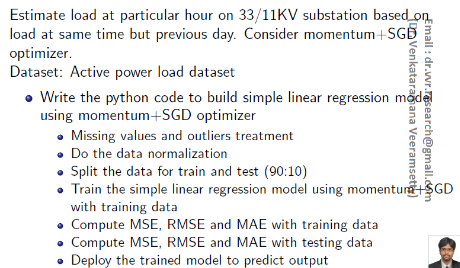

In [9]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Load_Data_in_kW.xlsx',header=None)
df.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


**Missing values**

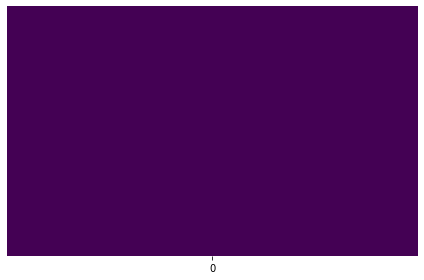

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [11]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
#print(z)

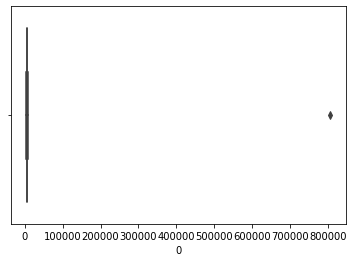

In [12]:
sns.boxplot(x=df[0])

In [13]:
#Filtering the outliers

q = df[0].quantile(0.99)
df[df[0] < q]
q_low = df[0].quantile(0.01)
q_hi  = df[0].quantile(0.99)

df_filtered = df[(df[0] < q_hi) & (df[0] > q_low)]
df_filtered.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


**COnfirmation of outliers**

In [14]:
print(len(df))
print(len(df_filtered))
if(len(df) == len(df_filtered)):
    print('Hence there are No outliners')
else:
  df = df_filtered.copy()
  print("There are outliers. SO consider only filtered data")

2184
2140
There are outliers. SO consider only filtered data


In [15]:
len(df)

2140

**Normalization**

In [16]:
data_n = df.copy()
data_n = (data_n - data_n.min())/(data_n.max() - data_n.min())
data_n.head()

,0
0,0.372950
1,0.254941
2,0.235273
3,0.273574
4,0.299162


In [17]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data_n,test_size=0.1)

In [26]:
len(train_data)

1926

In [18]:
x1 = []
y1 = []
for i in range(len(train_data.iloc[:,0])-24):
    x1.append(train_data.iloc[i,0])
    y1.append(train_data.iloc[i+24,0])

In [27]:
len(x1)

1902

In [30]:
import sympy as sym
from sympy import *
import random

mi=1
ci=-1
lr=0.1
epochs=10
gama=0.9
iter=1
sample=1
vm = vc = 0 #assuming to start from zero velocity
ns = len(x1) #number of samples in training dataset
while iter<=epochs:
  print('ITERATION {}'.format(iter))
  sample = 1
  while sample<ns-1:
    print("Sample {}".format(sample))
    #step 4: Error function for Gradient descent
    #declare the variables that you will be using in the error function
    x=sym.Symbol('x')
    y=sym.Symbol('y')
    m=sym.Symbol('m')
    c=sym.Symbol('c')
    E=(0.5)*(y-m*x-c)**2  #ERROR FUNCTION


    derivE_m=sym.diff(E,m) #differentiation of E wrto m
    derivE_c=sym.diff(E,c)  #differentiate E wrto c
    #print(derivE_m)
    #print(derivE_c)
    #print('after subs m and c')
    #print('in derivE_m')
    derivE_m = derivE_m.subs(m, mi) 
    derivE_m = derivE_m.subs(c, ci)

    xi =  x1[sample-1]
    yi = y1[sample-1]
    derivE_m = derivE_m.subs(x,xi)
    derivE_m = derivE_m.subs(y,yi)

    #print(derivE_m)
    #print('in derivE_c')
    derivE_c = derivE_c.subs(m, mi) 
    derivE_c = derivE_c.subs(c, ci)
    derivE_c = derivE_c.subs(x,xi)
    derivE_c = derivE_c.subs(y,yi)

    gm = derivE_m
    gc = derivE_c

    #step 5 compute velocity (before steplen)
    vm = gama*vm - lr*gm
    vc = gama*vc - lr*gc

    #step 6 update model params
    mi = mi+vm
    ci = ci+vc
    print(mi)
    print(ci)
    print('-----------------------------------')
    #step 7 increment sample
    sample = sample+1

  iter=iter+1
  
  

print("Local minima values of m and c are: ",mi,ci)


Streaming output truncated to the last 5000 lines.
0.430386055263058
0.627113064101975
-----------------------------------
Sample 652
0.400020049730634
0.580367566064640
-----------------------------------
Sample 653
0.348763437541643
0.506988183694453
-----------------------------------
Sample 654
0.250869958596900
0.388436811845589
-----------------------------------
Sample 655
0.156876877814046
0.266193126239309
-----------------------------------
Sample 656
0.0779471074630643
0.173420785627508
-----------------------------------
Sample 657
0.0111340968318534
0.107374535702742
-----------------------------------
Sample 658
-0.0352512269066627
0.0783445636116187
-----------------------------------
Sample 659
-0.0576913001492266
0.109495902834341
-----------------------------------
Sample 660
-0.0696650525847250
0.160840349922418
-----------------------------------
Sample 661
-0.0680540925211607
0.231482800242712
-----------------------------------
Sample 662
-0.0471910643464606
0.327

**TRAINING ERROR**

In [31]:

y_train_pred = [i for i in x1]
for j in range(len(x1)):
    y_train_pred[j]=(mi*x1[j] + ci)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y1,y_train_pred)
mse

0.04505901460387142

**MSE, RMSE, MAE - Training Error**

In [32]:

import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
mse = math.sqrt(mean_squared_error(y1, y_train_pred)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y1, y_train_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y1, y_train_pred)
print('Mean absolute error', mae)

Root mean square error 0.21227108753636567
Mean square error 0.04505901460387142
Mean absolute error 0.17441218703612216


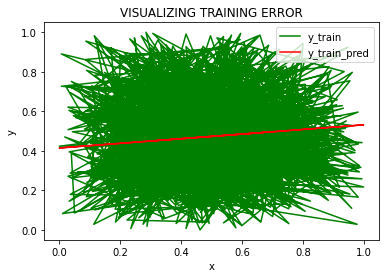

In [33]:
#Plot a line graph

import matplotlib.pyplot as plt
plt.plot(x1,y1,label='y_train',color='green')
plt.plot(x1,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**TESTING ERROR**

In [34]:
x2 = []
y2 = []
for i in range(len(test_data.iloc[:,0])-24):
    x2.append(test_data.iloc[i,0])
    y2.append(test_data.iloc[i+24,0])

In [35]:

y_test_pred = [i for i in x2]
for j in range(len(x2)):
    y_test_pred[j]=(mi*x2[j] + ci)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y2,y_test_pred)
mse

0.04797718472893102

**MSE, RMSE, MAE - Testing data**

In [36]:

import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
mse = math.sqrt(mean_squared_error(y2, y_test_pred)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y2, y_test_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y2, y_test_pred)
print('Mean absolute error', mae)

Root mean square error 0.21903694831907017
Mean square error 0.04797718472893102
Mean absolute error 0.17835629429810837


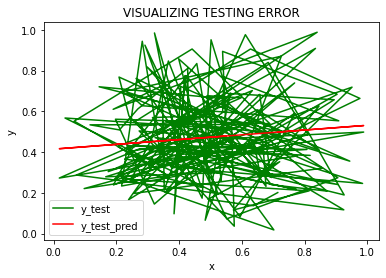

In [37]:
#Plot a line graph

import matplotlib.pyplot as plt
plt.plot(x2,y2,label='y_test',color='green')
plt.plot(x2,y_test_pred,label='y_test_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TESTING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**Deploy - prediction**

In [38]:
x_max = y_max= 8841.669480
x_min = y_min = 3377.919600
x =x1 = float(input("Enter the load of previous hour :"))
x = (x - x_min)/(x_max - x_min)
y = mi*x + ci
y = y*(y_max - y_min) + y_min
print(f"Predicted load at hour based on its previous hour is : {y}")

Enter the load of previous hour :5678.90
Predicted load at hour based on its previous hour is : 5912.17544624622
